In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (15.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129504 files and dir

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.family'] = 'AppleGothic' 
mpl.rcParams['font.size'] = 14

In [5]:
df = pd.read_excel('/content/gdrive/MyDrive/EDA/성동구분석/성동구_업종.xlsx')

df.head()
# 동 선정 완료! -> 성수1가1동/금호2,3가동/금호1가동

,행정동,생활밀접업종,전체점포수,프랜차이즈점포수,일반점포수,년도,분기
0,왕십리2동,외식업,150,21,129,2022,3
1,왕십리도선동,외식업,501,97,404,2022,3
2,마장동,외식업,222,23,199,2022,3
3,사근동,외식업,412,109,303,2022,3
4,행당1동,외식업,318,82,236,2022,3


In [6]:
df_s = df[df['행정동'] == '성수1가1동']
df_g1= df[df['행정동'] == '금호1가동']
df_g23= df[df['행정동'] == '금호2.3가동']

In [7]:
df_s.sort_values('전체점포수', ascending=False ).head()

,행정동,생활밀접업종,전체점포수,프랜차이즈점포수,일반점포수,년도,분기
45,성수1가1동,소매업,407,23,384,2022,3
28,성수1가1동,서비스업,250,7,243,2022,3
11,성수1가1동,외식업,240,30,210,2033,3


In [8]:
df_g1.sort_values('전체점포수', ascending=False ).head()

,행정동,생활밀접업종,전체점포수,프랜차이즈점포수,일반점포수,년도,분기
24,금호1가동,서비스업,167,11,156,2022,3
41,금호1가동,소매업,166,12,154,2022,3
7,금호1가동,외식업,78,18,60,2022,3


In [9]:
df_g23.sort_values('전체점포수', ascending=False ).head()

,행정동,생활밀접업종,전체점포수,프랜차이즈점포수,일반점포수,년도,분기
42,금호2.3가동,소매업,289,18,271,2022,3
25,금호2.3가동,서비스업,283,12,271,2022,3
8,금호2.3가동,외식업,251,39,212,2022,3


In [10]:
sur = pd.read_excel('/content/gdrive/MyDrive/EDA/성동구분석/동별_신생_생존율.xlsx')
sur.head()

,행정구역,생활밀접업종,2022_1분기_1년생존율,2022_1분기_3년생존율,2022_1분기_5년생존율,2022_2분기_1년생존율,2022_2분기_3년생존율,2022_2분기_5년생존율,2022_3분기_1년생존율,2022_3분기_3년생존율,2022_3분기_5년생존율
0,성동구 왕십리2동,업종 전체,71.6,53.9,23.5,77.2,51.9,30.5,78.1,55.4,40.4
1,성동구 왕십리도선동,업종 전체,79.0,54.7,37.1,83.7,54.9,47.1,83.0,58.8,43.8
2,성동구 마장동,업종 전체,83.5,71.4,58.9,93.9,77.3,64.4,86.7,70.1,57.9
3,성동구 사근동,업종 전체,81.3,54.4,32.8,84.1,54.9,36.4,83.3,58.1,41.2
4,성동구 행당1동,업종 전체,78.6,55.1,35.5,78.4,61.1,38.7,79.3,52.2,43.9


구체적 분석

In [11]:
total = pd.read_csv('/content/gdrive/MyDrive/EDA/성동구분석/전체업종.csv', encoding = 'euc-kr')

total.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,9548586,2264,...,29,102,2162,225,1414,409,118,83,15,6
1,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,103492276,370,...,0,370,0,0,0,0,0,370,0,4
2,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,55855797,130,...,0,0,130,0,0,130,0,0,0,6
3,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,8443170204,4794,...,0,2151,2643,0,105,388,987,1164,2150,6
4,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,576420408,8392,...,6,4326,3023,72,1757,2508,1961,650,398,5


In [12]:
region = pd.read_csv('/content/gdrive/MyDrive/EDA/성동구분석/상권영역.csv', encoding = 'euc-kr')
region = region.drop('형태정보', axis=1)

region.head()

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드
0,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934,438813,11545,11545710
1,202112,A,골목상권,2110427,노원 을지대학교병원,206265,459431,11350,11350611
2,202112,A,골목상권,2110755,동일여자고등학교,192300,439070,11545,11545680
3,202112,A,골목상권,2110739,시흥3동 우편취급국,191289,438014,11545,11545690
4,202112,A,골목상권,2111017,송파나루역 3번,210222,445516,11710,11710562


In [13]:
reg = pd.read_excel('/content/gdrive/MyDrive/EDA/성동구분석/행정구역코드.xlsx')
reg = reg.drop(0, axis=0)
reg.head() #행자부행정동코드 사용

,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명
1,1101053,11110530,서울,종로구,사직동
2,1101054,11110540,서울,종로구,삼청동
3,1101055,11110550,서울,종로구,부암동
4,1101056,11110560,서울,종로구,평창동
5,1101057,11110570,서울,종로구,무악동


성수1가1동

In [14]:
# 동 선정 완료! -> 성수1가1동/금호2,3가동/금호1가동
reg[reg['행정동명'] == '성수1가1동']

,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명
57,1104065,11200650,서울,성동구,성수1가1동


In [15]:
reg[reg['행정동명'] == '금호2.3가동']

,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명
64,1104072,11200615,서울,성동구,금호2.3가동


In [16]:
reg[reg['행정동명'] == '금호1가동']

,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명
55,1104059,11200590,서울,성동구,금호1가동


In [17]:
region[region['행정동_코드']==11200650]

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드
214,202112,A,골목상권,2110126,서울숲역 1번,204125,449553,11200,11200650
265,202112,A,골목상권,2110127,성수1가1동주민센터,204372,449136,11200,11200650
655,202112,A,골목상권,2110128,성원중학교,204404,448735,11200,11200650
1194,202112,D,발달상권,2120050,서울숲역,204129,449171,11200,11200650


In [18]:
ss1 = total[total['상권_코드']== 2110126]
ss2 = total[total['상권_코드']== 2110127]
ss3 = total[total['상권_코드']== 2110128]
ss4 = total[total['상권_코드']== 2120050]

In [19]:
seongsu = pd.concat([ss1, ss2, ss3, ss4])
seongsu.tail()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
81812,2022,1,D,발달상권,2120050,서울숲역,CS200025,자동차수리,901566594,517,...,0,355,108,0,0,0,109,191,163,*
81813,2022,1,D,발달상권,2120050,서울숲역,CS200002,외국어학원,133751405,216,...,34,79,137,0,0,11,114,91,0,*
81814,2022,1,D,발달상권,2120050,서울숲역,CS100010,커피-음료,125089759,14273,...,7,5111,6866,164,3681,5105,1856,869,307,11
81815,2022,1,D,발달상권,2120050,서울숲역,CS100006,패스트푸드점,64752367,2003,...,138,941,570,0,155,258,492,389,216,*
81816,2022,1,D,발달상권,2120050,서울숲역,CS100001,한식음식점,283840441,7448,...,660,4629,1208,0,435,1897,1542,1393,573,7


In [20]:
seongsu.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [21]:
'남성_매출_비율', '여성_매출_비율','연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율'

('남성_매출_비율',
 '여성_매출_비율',
 '연령대_10_매출_비율',
 '연령대_20_매출_비율',
 '연령대_30_매출_비율',
 '연령대_40_매출_비율',
 '연령대_50_매출_비율',
 '연령대_60_이상_매출_비율')

In [22]:
seongsu[['남성_매출_비율', '여성_매출_비율']]
seongsu['남성_매출_비율'].sum(), seongsu['여성_매출_비율'].sum()
#남여, 큰 차이 없음 (10프로 정도?)

(11937, 9383)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_te

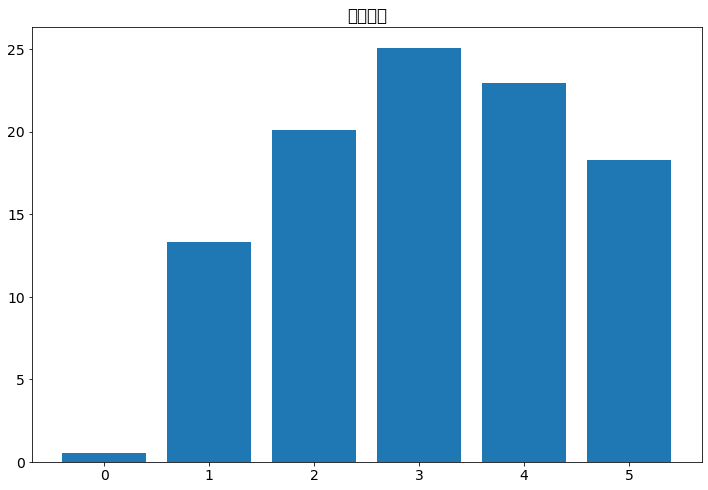

In [23]:
Y = [seongsu['연령대_10_매출_비율'].mean(), seongsu['연령대_20_매출_비율'].mean()
    ,seongsu['연령대_30_매출_비율'].mean(), seongsu['연령대_40_매출_비율'].mean()
    ,seongsu['연령대_50_매출_비율'].mean(), seongsu['연령대_60_이상_매출_비율'].mean()]

X = np.arange(len(Y))

xlabel=['10대 매출', '20대 매출', '30대 매출', '40대 매출', '50대 매출', '60대 이상 매출']
plt.title('매출비율')
plt.bar(X, Y)
plt.show()
#30-40대 50% --> 30/40대 노려야 함

In [24]:
con = seongsu[['서비스_업종_코드_명', '분기당_매출_금액', '점포수', '연령대_30_매출_비율', '연령대_40_매출_비율', '연령대_30_매출_금액',
       '연령대_40_매출_금액']]

con.sort_values('연령대_30_매출_비율', ascending=False) #운동/경기용품(점포당0.1억), pc방 (점포당 1억정도)
con.sort_values('연령대_30_매출_금액', ascending=False).head(10) #전자상거래업, pc방, 슈퍼마켓 (점포당 1억)
con.sort_values('연령대_40_매출_금액', ascending=False).head(10) #전자상거래, 화장품, 청과상
con.sort_values('연령대_40_매출_비율', ascending=False).head(10) #운동/경기용품, 여관, 일반의류

,서비스_업종_코드_명,분기당_매출_금액,점포수,연령대_30_매출_비율,연령대_40_매출_비율,연령대_30_매출_금액,연령대_40_매출_금액
66652,운동/경기용품,42148673,3,0,100,0,42148673
101217,여관,6250000,5,0,100,0,6250000
66689,일반의류,43556599,12,0,100,0,43556599
66679,일반교습학원,135549832,10,2,91,3038903,123423288
81806,전자상거래업,4062400858,9,17,82,693989702,3335774148
32399,일반교습학원,43166186,*,0,80,69202,34600782
66646,인테리어,11462470,9,5,73,507556,7041413
47398,화장품,1815074032,5,6,70,110383951,1267406679
66695,일반교습학원,30527954,*,0,70,25870,21494182
66666,여관,10526316,5,0,70,0,7368421


금호1가동